# FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:

There are 1,898 rows and 9 columns.



### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   There are 5 numerical columns in the data and 4 object type columns.
*   rating is being read as object type column but it should be a numerical column.









### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

**In previous question, we already know all columns' value are non-null, so we further check the 4 object type columns.**

In [ ]:
# Write your code here
# Check the total number of unique values in the 4 object type columns.

# Making a list of all object type columns
cat_cols =  ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

# Printing the total number of unique values in each column
for column in cat_cols:
    print(column, ': ', df[column].unique(),'\n')
    print("-" * 50)


restaurant_name :  ['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda" "Mamoun's Falafel" 'Prosperity Dumpling'
 'Blue Ribbon Sushi Bar & Grill' 'Westville Hudson' 'Blue Ribbon Brooklyn'
 'Nobu Next Door' 'Osteria Morini' 'Haandi' 'Benihana' 'Han Dynasty'
 'Chote Nawab' 'Mission Cantina' "Xi'an Famous Foods"

**There are some rows with 'Not given' ratings. Add a new column with numeric rating, those 'Not given' will be NaN in this new column. Check both columns' value afterwards.**

In [ ]:
# There are some rows with 'Not given' ratings. Add a new column with numeric rating, those 'Not given' will be NaN in this new column.
# Check both columns' value and data type afterwards.
df['num_rating'] = pd.to_numeric(df['rating'], errors='coerce')
print('rating: ', df['rating'].unique(), 'data type -', df['rating'].dtype,'\n')
print('num_rating: ', df['num_rating'].unique(), 'data type -', df['num_rating'].dtype,'\n')


rating:  ['Not given' '5' '3' '4'] data type - object 

num_rating:  [nan  5.  3.  4.] data type - float64 



**Double check if there are duplicate entries.**

In [ ]:
# Check if there are duplicate entries
df.duplicated().sum()

0

In [ ]:
# Check if cuisine_type is consistant within the same restaurant's orders
df_rc = df.groupby(['restaurant_name','cuisine_type']).cuisine_type.value_counts()
duplicate_first_index_values = df_rc.index.get_level_values(0)[df_rc.index.get_level_values(0).duplicated(keep=False)]
print("Duplicate First Index Values:", duplicate_first_index_values.unique())

Duplicate First Index Values: Index(['The Meatball Shop'], dtype='object', name='restaurant_name')


In [ ]:
# Print the inconsistant entries
for idx, value in df_rc.items():
    if idx[0] == 'The Meatball Shop':
       print("Index:", idx, "Value:", value)

Index: ('The Meatball Shop', 'American') Value: 20
Index: ('The Meatball Shop', 'Italian') Value: 112


In [ ]:
# Correct the cuisine_type to Italian and check again

df.loc[df.restaurant_name == 'The Meatball Shop', 'cuisine_type'] = 'Italian'

df_rc = df.groupby(['restaurant_name','cuisine_type']).cuisine_type.value_counts()
duplicate_first_index_values = df_rc.index.get_level_values(0)[df_rc.index.get_level_values(0).duplicated(keep=False)]
print("Duplicate First Index Values:", duplicate_first_index_values.unique())

Duplicate First Index Values: Index([], dtype='object', name='restaurant_name')


#### Observations:
*   There are some rows with 'Not given' ratings. Add a new column with numeric rating, those 'Not given' will be NaN in this new column.
*   Also double check if there are duplicate entries, otherwise we need to clean up.
*   Check if cuisine_type is consistant within the same restaurant's orders. Find some orders of The Meatball Shop are classified as American incorrectly, correct them to Italian.
*   All the 4 columns can be considered as categorical columns.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0
num_rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0


**Let's check the count and percentage of categorical levels in each column**

In [ ]:
# We declare this column list before, let's reuse it.
# cat_cols =  ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

# Printing the count of unique categorical levels and the percentage of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
restaurant_name
Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: proportion, Length: 178, dtype: float64
--------------------------------------------------


#### Observations:


*   `food_preparation_time`:  Minimum 20 mins, average 27.37 mins, maximum 35 mins. The median is 27 mins, almost the same as average.

*   `delivery_time`:  Minimum 15 mins, average 24 mins, maximum 33 mins.  The median is 25 mins, pretty close to average too.

*   `num_rating`: In previous analysis, we add this new numeric column to store the numeric version rating for later easier analysis. The orders are rated from 3 to 5, average 4.34, median 5.

*   `rating`: 38.78% of total orders are not rated. 30.98% are rated 5, only 9.91% are rated 3.

*   `day_of_the_week`: There are only two categories, "Weendend" and "Weekday". 1351 of 1898 orders, about 71.18% are in Weekend.

*   `cost_of_the_order`:   Minimum $4.47, average \$16.50, maximum \$35.41. The median is \$14.14, not far from average.

*   `cuisine_type`: There are totally 14 cuisine types. The most ordered one is American, about 30.77% of the total no. of orders.

*   `restaurant_name`: There are 178 restaurants. The most ordered one is Shake Shack, about 11.54% of the total no. of orders.

### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here

print(df.num_rating.isnull().sum(), 'orders are not rated,', "{:.2%}".format(df.num_rating.isnull().sum()/df.shape[0]), 'of total orders.')

736 orders are not rated, 38.78% of total orders.


#### Observations:
736 orders are not rated, which consists 38.78% of the total 1898 orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.

**Let us explore the numerical variables first.**

In [ ]:
# Write the code here

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
num_rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00


**Observations on Order Cost**

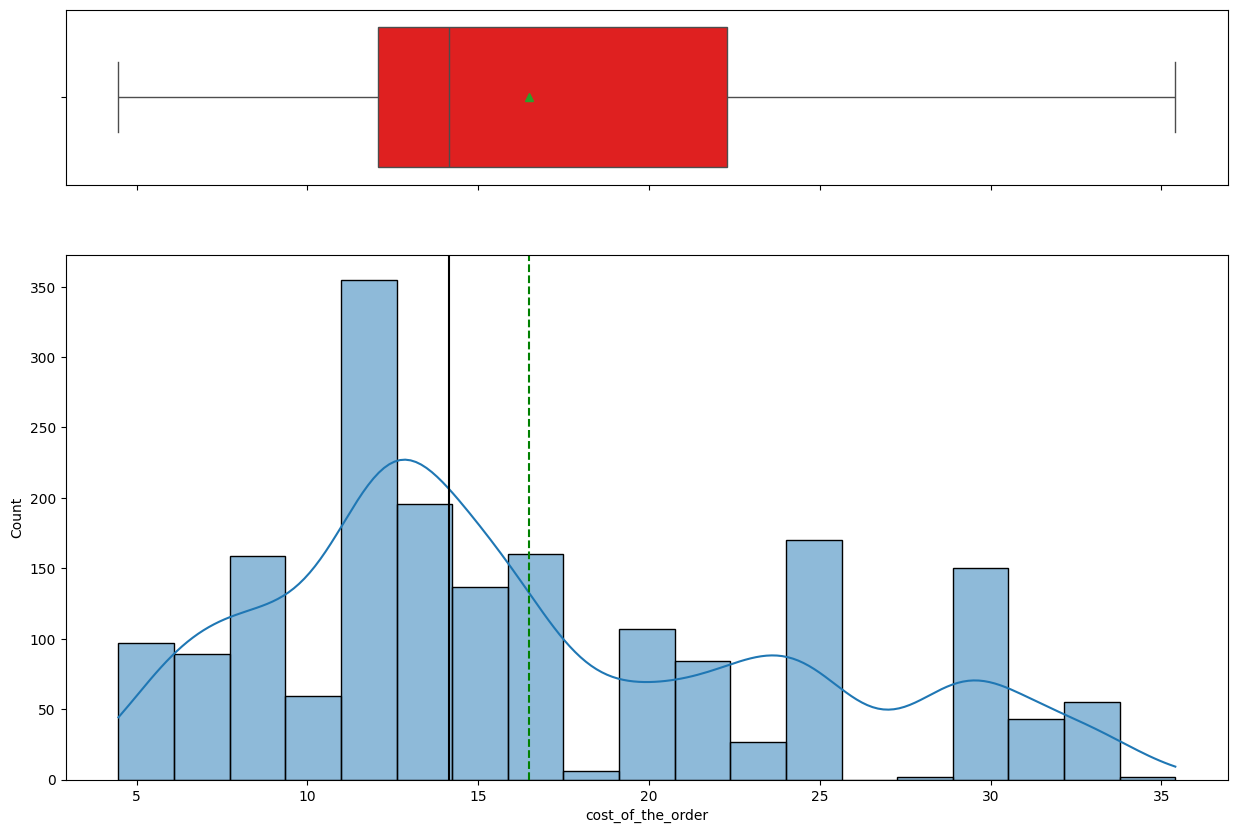

In [ ]:
histogram_boxplot(df.cost_of_the_order);



*   Order cost's distribution is skewed towards right.
*   There are no outliers.
*   75% of the orders are within \$22.30.

**Observations on Delivery Time**

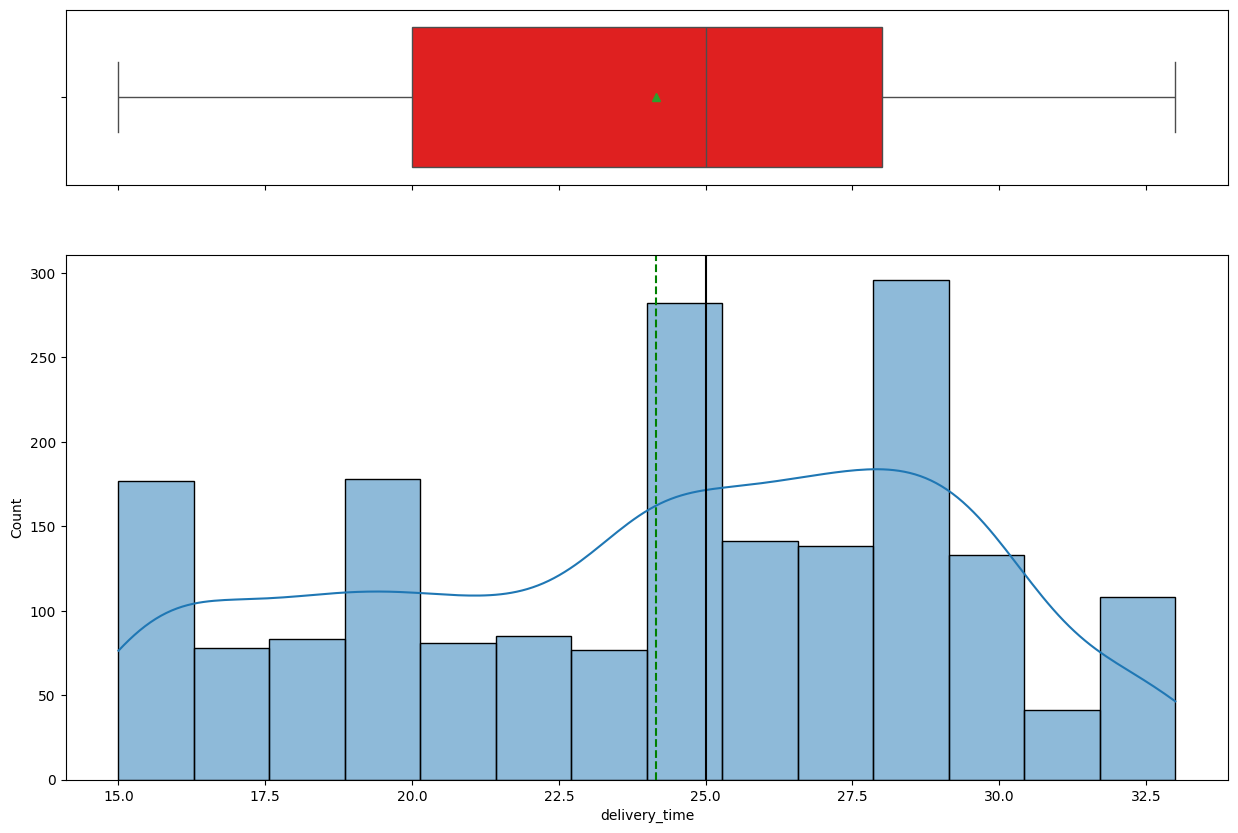

In [ ]:
histogram_boxplot(df.delivery_time);


*   Delivery time's distribution is skewed towards the left.
*   There are no outliers.
*   The delivery time will be impacted by distance and traffic so it's reasonable that it follows normal distribution, let's further explore later.

**Observations on Food Preparation Time**

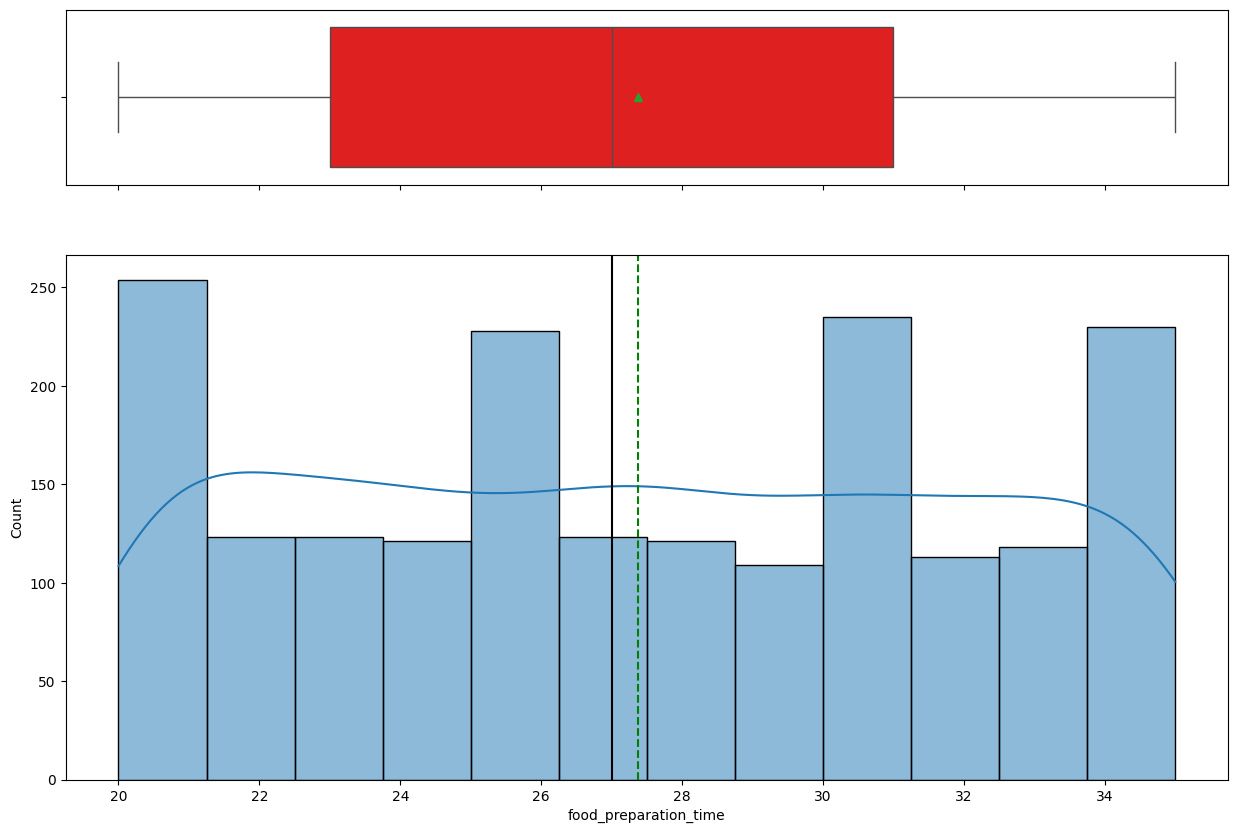

In [ ]:
histogram_boxplot(df.food_preparation_time);



*   The distribution of food preparation time is in Uniform Distribution.
*   There are no outliers.
*   Unlike delivery time, food preparation time will not be impacted by other outside factors, it's mainly determined by the restaurant itself. It's reasonable that it follows uniform distribution, it shows all the involved restaurants have similar food preparation time.

**Observations on Rating**

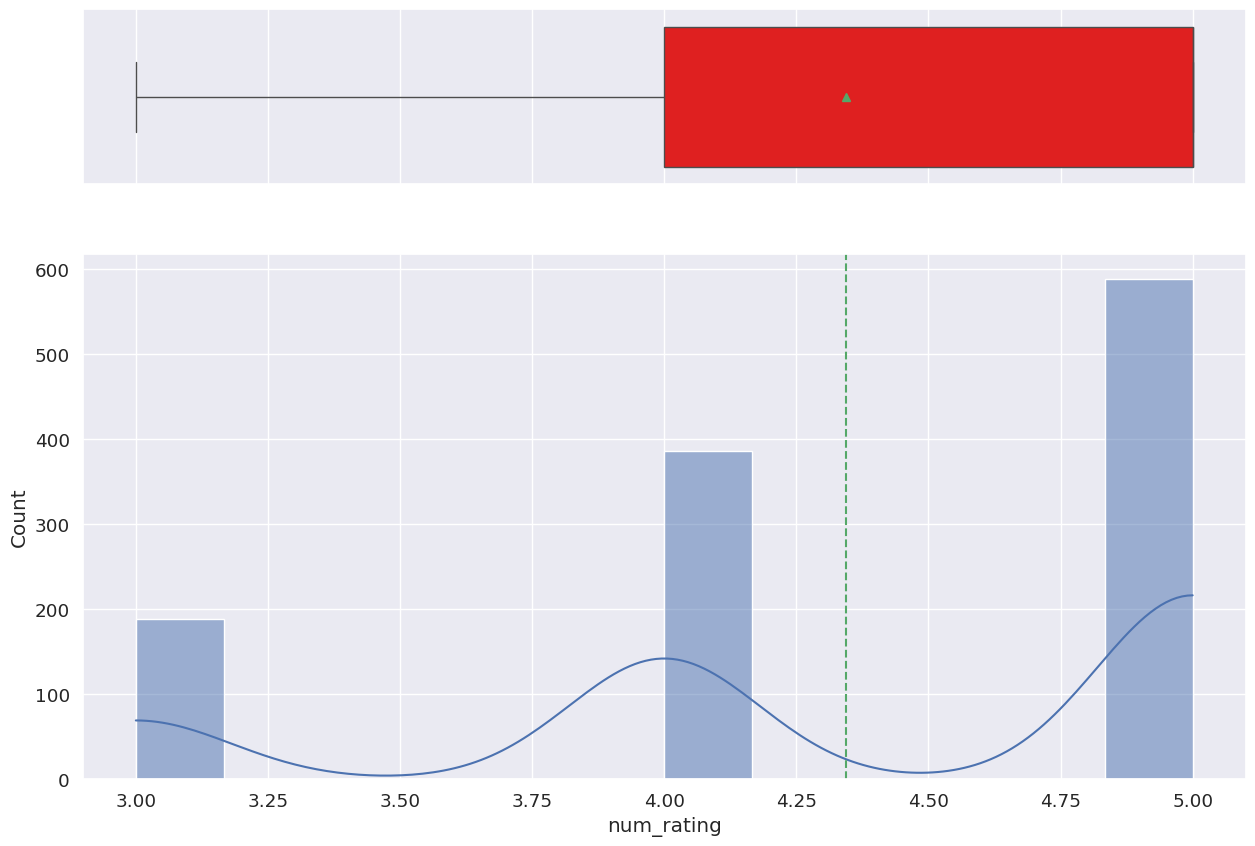

num_rating
5.0    0.506024
4.0    0.332186
3.0    0.161790
Name: proportion, dtype: float64

In [ ]:
histogram_boxplot(df.num_rating);
df['num_rating'].value_counts(normalize=True)


*   Rating's distribution is skewed towards left.
*   There are no outliers.
*   50% of the orders are rated as 5.

**Let us explore the categorical variables.**

**Observations on Day of the Week**

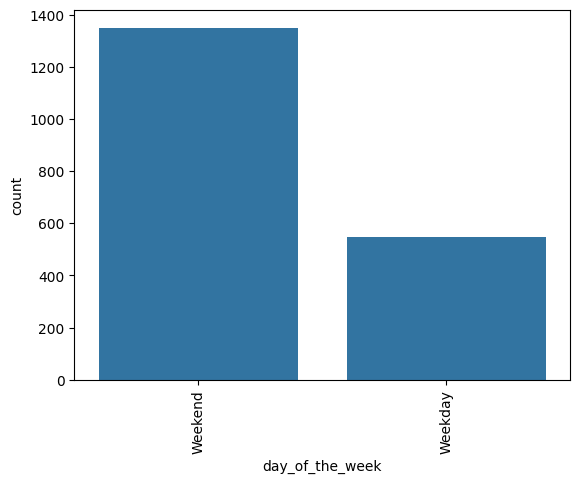

day_of_the_week
Weekend    0.711802
Weekday    0.288198
Name: proportion, dtype: float64

In [ ]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()
df['day_of_the_week'].value_counts(normalize=True)


*   71.18% of the orders are in Weekend.

**Observations on Cuisine Type**

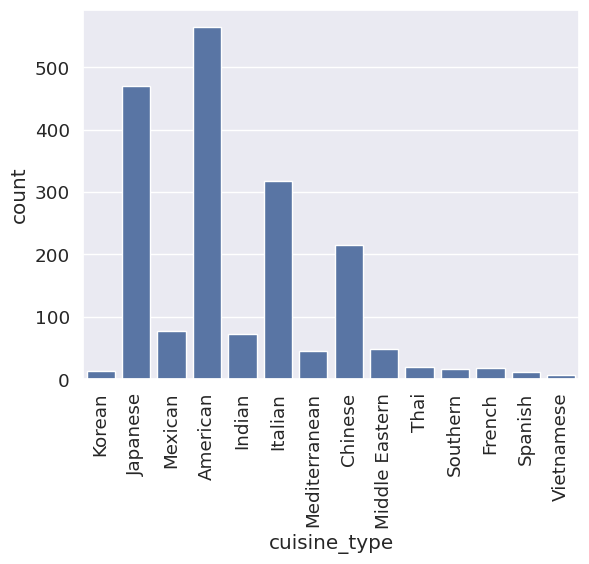

cuisine_type
American          0.297155
Japanese          0.247629
Italian           0.167545
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: proportion, dtype: float64

In [ ]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()
df['cuisine_type'].value_counts(normalize=True)


*   4 cuisines are far more popular than the others: American, Japanese, Italian and Chinese. They consists 82.56% of the total orders.

**Observations on Restaurant**



In [ ]:
# As there are some non-English characters in some restaurant names unsupported by the font, suppress the warning.
import warnings
warnings.filterwarnings("ignore", message="Glyph .* missing from current font")

# There are so many restaurants. Let's make a dataframe to store their order counts for easier analysis.
# Calculate counts of each restaurant name
resto = df['restaurant_name'].value_counts().reset_index()
resto.columns = ['restaurant_name', 'orders']

# Sort by count
resto = resto.sort_values(by='orders', ascending=False)

# Check the statistical summary
resto.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
restaurant_name,178,178,Shake Shack,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orders,178.0,NaN,NaN,NaN,10.662921,24.047008,1.0,1.0,3.0,8.75,219.0


The restaurant order count has a huge standard deviation. Also, there is a huge difference between the maximum value and the 75% percentile which indicates there are outliers.

Let's see the order distribution among restaurants.

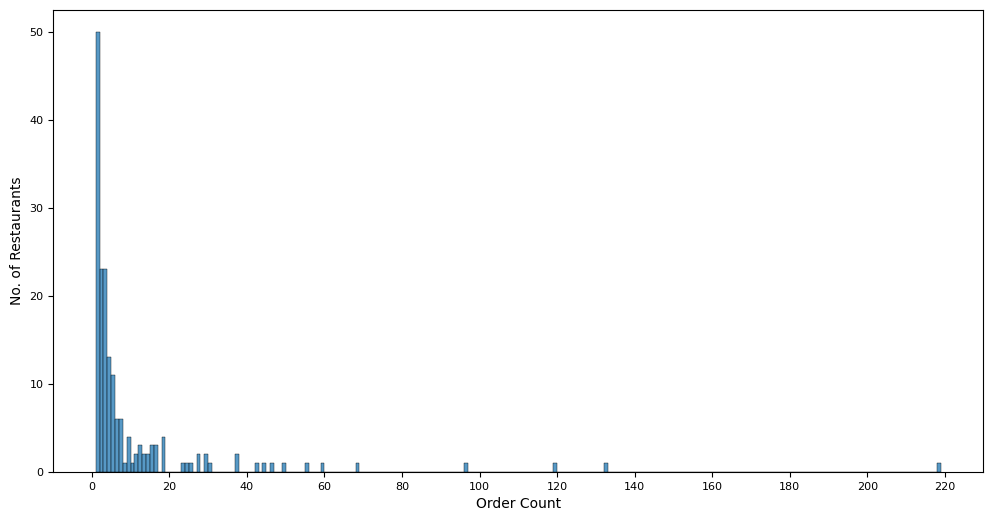

In [ ]:
# Show the order distribution among restaurants
plt.figure(figsize=(12, 6))
sns.histplot(data=resto, x='orders', binwidth=1)
plt.locator_params(axis='x', nbins=15)
plt.xlabel('Order Count', fontsize=10)
plt.ylabel('No. of Restaurants', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

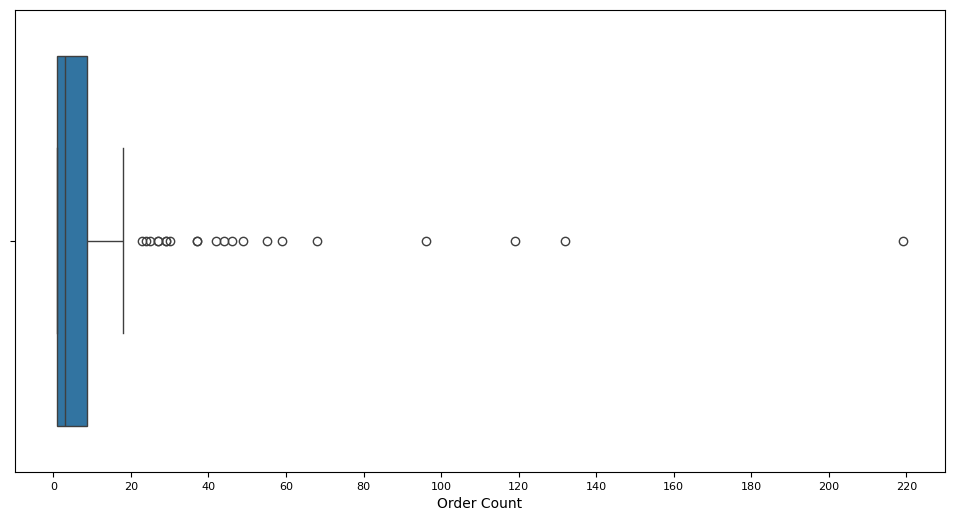

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=resto, x='orders')
plt.locator_params(axis='x', nbins=15)
plt.xlabel('Order Count', fontsize=10)
plt.xticks(fontsize=8)
plt.show()


*   The distribution is skewed towards the right.
*   There are many outliers, which means a small set of restaurants got far more orders than the others.
*   Most of the restaurants got less than 20 orders.

**Let's show the restaurants with more than 20 orders.**

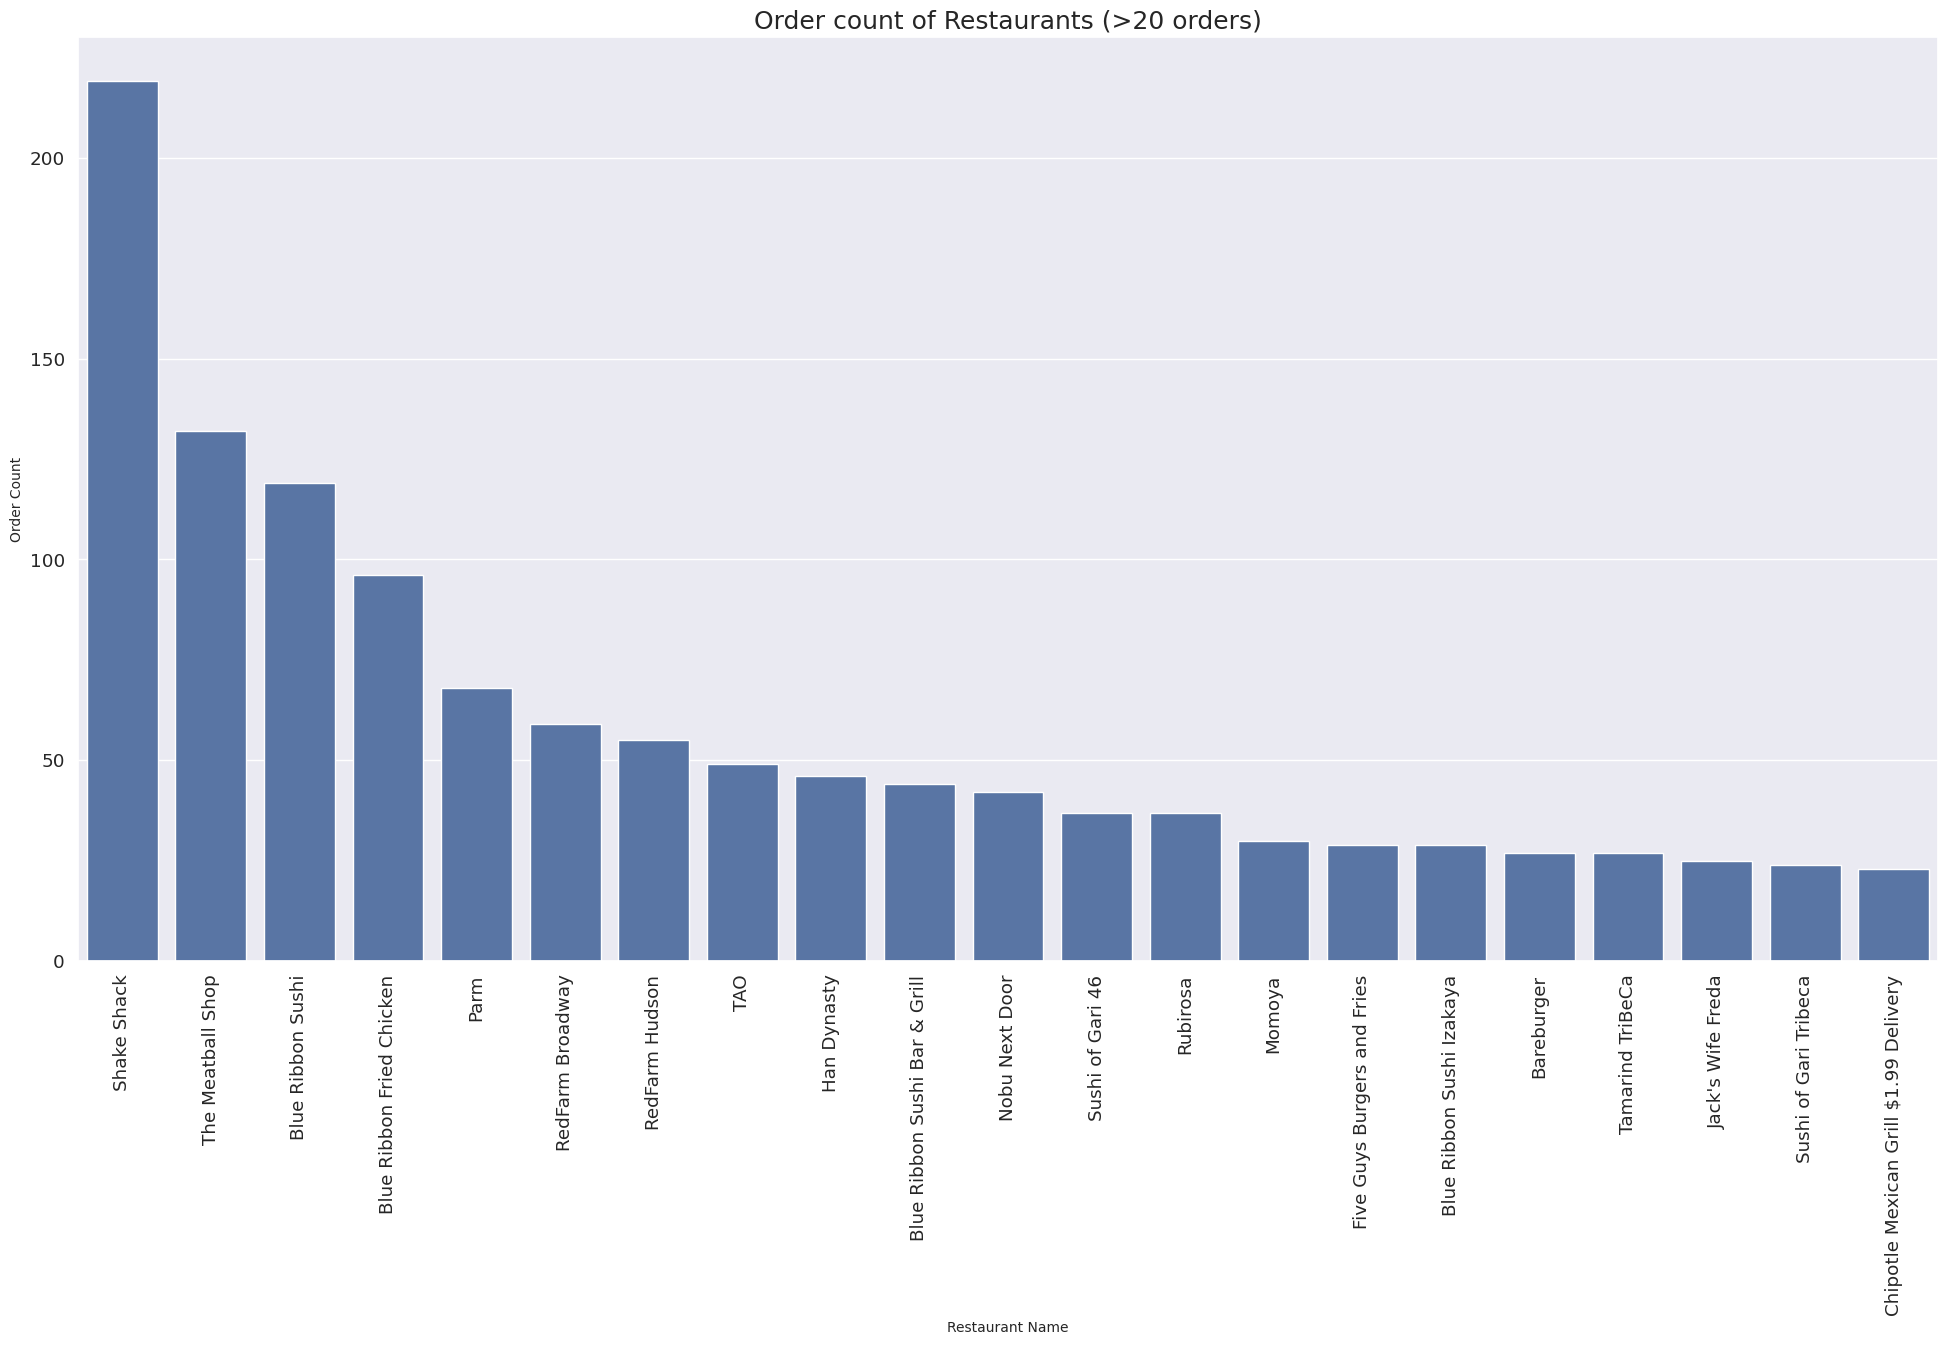

In [ ]:
plt.figure(figsize=(24,12))
sns.set(font_scale=1.2)
sns.barplot(data=resto[resto.orders > 20],y='orders',x='restaurant_name')
plt.xticks(rotation=90)
plt.title('Order count of Restaurants (>20 orders)', fontsize=18)
plt.ylabel('Order Count', fontsize=10)
plt.xlabel('Restaurant Name', fontsize=10)
plt.show()


In [ ]:
print(resto[resto.orders > 20].shape[0], 'restaurants got {:.2%}'.format(resto[resto.orders > 20].orders.sum()/resto.orders.sum()), 'of total orders.')
print(resto[resto.orders > 50].shape[0], 'restaurants got {:.2%}'.format(resto[resto.orders > 50].orders.sum()/resto.orders.sum()), 'of total orders.')

21 restaurants got 64.12% of total orders.
7 restaurants got 39.41% of total orders.


*   There are 21 restaurants, each got more than 20 orders. They occupied 64.12% of the orders.
*   Even within these 21 restaurants, the distribution is still highly skewed towards the right, some restaurants got more orders than the others.
*   The top 7 restaurants (more than 50 orders) occupied 39.41% of all orders.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
# We have summarized the order counts by restaurant, further calculate the percentage.
total_order_count = resto.orders.sum()
resto['order_percentage'] = (resto['orders'] / total_order_count) * 100
resto

,restaurant_name,orders,order_percentage
0,Shake Shack,219,11.538462
1,The Meatball Shop,132,6.954689
2,Blue Ribbon Sushi,119,6.269758
3,Blue Ribbon Fried Chicken,96,5.057956
4,Parm,68,3.582719
...,...,...,...
147,Coppola's East,1,0.052687
148,Kori Restaurant and Bar,1,0.052687
149,Woorijip,1,0.052687
150,Crema Restaurante,1,0.052687


#### Observations:
The top 5 restaurants in terms of the number of orders received and their percentages of the total orders are:

1.   Shake Shack                 11.54%
2.   The Meatball Shop            6.95%
3.   Blue Ribbon Sushi            6.27%
4.   Blue Ribbon Fried Chicken    5.06%
5.   Parm                         3.58%

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
df[df.day_of_the_week == "Weekend"].cuisine_type.value_counts()

cuisine_type
American          397
Japanese          335
Italian           225
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

In [ ]:
df[df.day_of_the_week == "Weekend"].cuisine_type.value_counts(normalize = True)

cuisine_type
American          0.293856
Japanese          0.247964
Italian           0.166543
Chinese           0.120651
Mexican           0.039230
Indian            0.036269
Mediterranean     0.023686
Middle Eastern    0.023686
Thai              0.011103
French            0.009623
Korean            0.008142
Southern          0.008142
Spanish           0.008142
Vietnamese        0.002961
Name: proportion, dtype: float64

#### Observations:
The most popular cuisine on weekends is American, consists 29.39% of the total orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
print("{:.2%}".format(df[df.cost_of_the_order > 20].shape[0]/df.shape[0]))

29.24%


#### Observations:
29.24% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
df.delivery_time.mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24 mins.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Write the code here
df.customer_id.value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

#### Observations:
The top 3 most frequent customers' IDs and the number of orders they placed are:

1.  52832 ---------    13 orders

2.  47440 ---------    10 orders

3.  83287 -----------     9 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset.


**Check the numerical variables' correlations.**

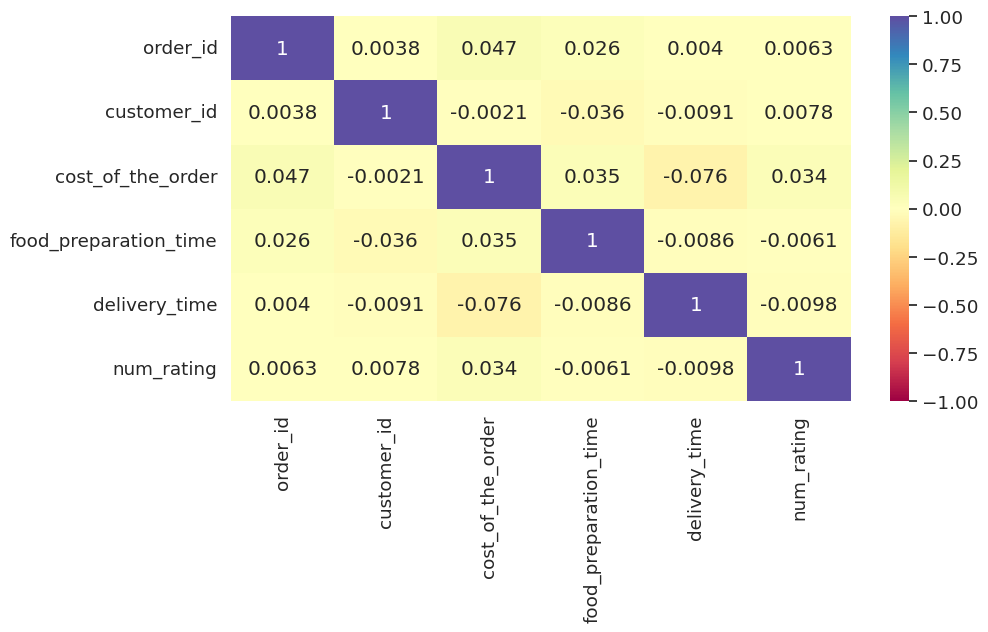

In [ ]:
# Write the code here

# create anther dataframe to select orders with ratings
df_2 = df[df.num_rating.notnull()].copy()

# Try to run heatmap on numberic columns
numeric_df = df_2.select_dtypes(include='number')
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

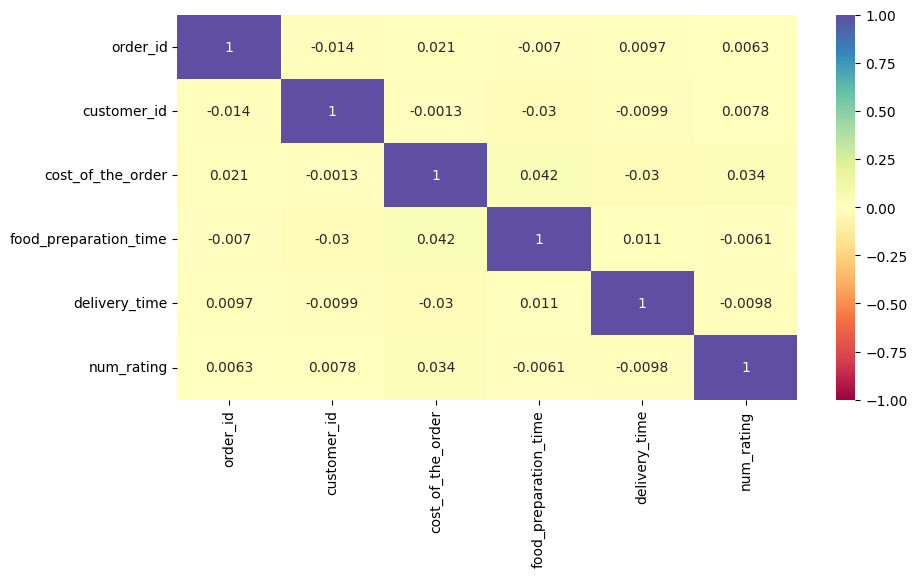

In [ ]:
# Try to run heatmap on numberic columns even with null ratings
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

*   No matter with or without null rating entries, the numbers are way too small, no obvious correlation between any of the numeric columns. Let's try something else.





**Check the other categorical variables' impact on Cost of the Order.**

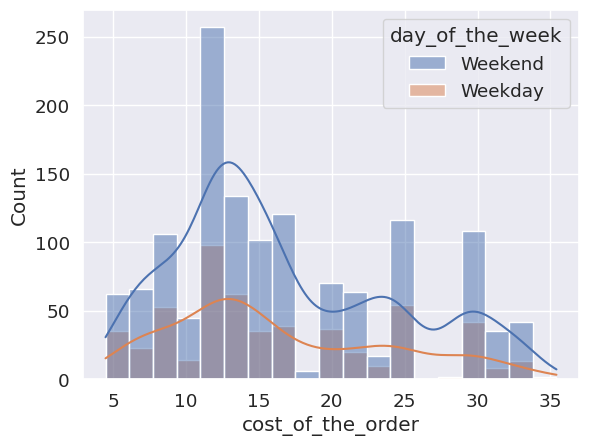

In [ ]:
sns.histplot(data=df, x='cost_of_the_order', hue='day_of_the_week', kde=True);


*   Weekend have a lot more orders.
*   The distribution of cost of order is similar, except the weekend one  is more right skewed.


<Figure size 2000x700 with 0 Axes>

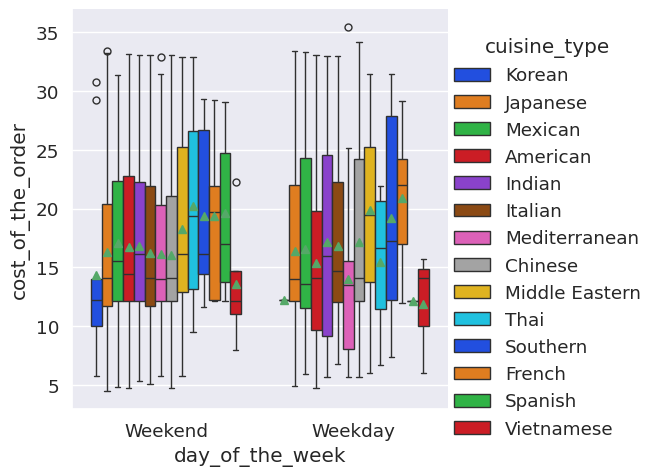

In [ ]:
plt.figure(figsize=(20,7))
sns.catplot(data=df, x="day_of_the_week", y="cost_of_the_order", hue="cuisine_type", showmeans=True, kind='box', palette='bright');


*   Almost no order of Korean and Spanish on weekday.
*   American and Middle Eastern is more right skewed in weekend.
*   Mediterranean and Vietnamese is right skewed in weekend, left skewed in weekday.
*   Generally, all cuisine type show more variance on cost of order in weekday.



**Check the top 7 restaurants' (with most no. of orders) cost of order.**

In [ ]:
# Create a new dataframe, select the orders from the top 7 restaurants (with most orders) only.
df_top7 = pd.merge(resto[resto.orders > 50],df,how='inner',on='restaurant_name')


<Figure size 5000x1000 with 0 Axes>

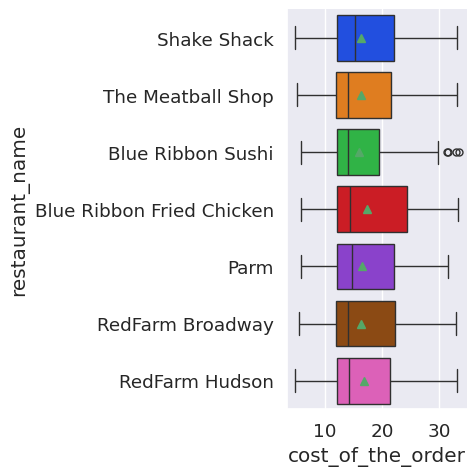

In [ ]:
plt.figure(figsize=(50,10))
sns.catplot(data=df_top7, y="restaurant_name", x="cost_of_the_order", hue="restaurant_name", showmeans=True, kind='box', palette='bright');



*   Blue Ribbon Sushi has some outliners which have much bigger cost.
*   All are right skewed. And the median and mean are similar, variance are similar too.



<Figure size 2000x700 with 0 Axes>

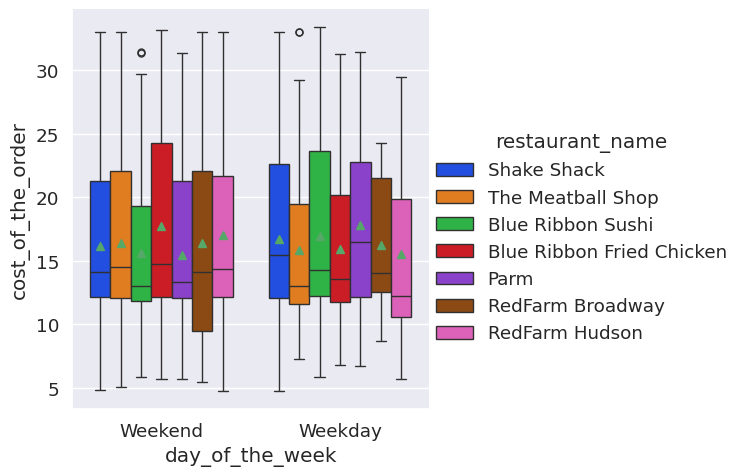

In [ ]:
plt.figure(figsize=(20,7))
sns.catplot(data=df_top7, x="day_of_the_week", y="cost_of_the_order", hue="restaurant_name", showmeans=True, kind='box', palette='bright');



*   Blue Ribbon Sushi has some outliners which have much bigger order cost in weekend.
*   The Meatball Shop has some outliners which have much bigger order cost in weekday.
*   RedFarm Broadway more low cost order in weekend.
*   RedFarm Hudson more low cost order in weekday.



**Check the order cost distribution among all restaurants.**

In [ ]:
resto_cost = df.groupby(['restaurant_name','cuisine_type']).cost_of_the_order.sum().reset_index()
resto.columns = ['restaurant_name', 'cuisine_type', 'cost_of_the_order']

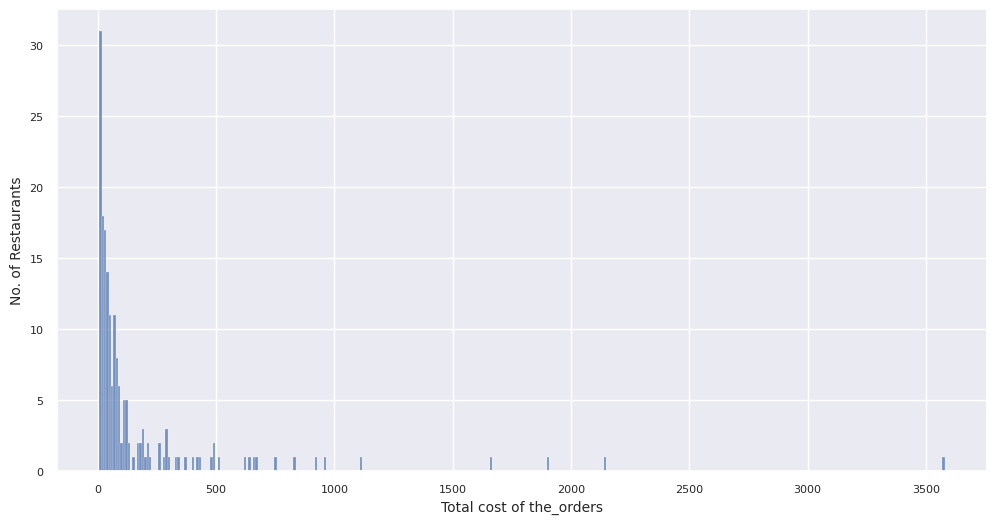

In [ ]:
# Show the order cost distribution among restaurants
plt.figure(figsize=(12, 6))
sns.histplot(data=resto_cost, x='cost_of_the_order', binwidth=10)
plt.locator_params(axis='x', nbins=15)
plt.xlabel('Total order cost of the restaurant', fontsize=10)
plt.ylabel('No. of Restaurants', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

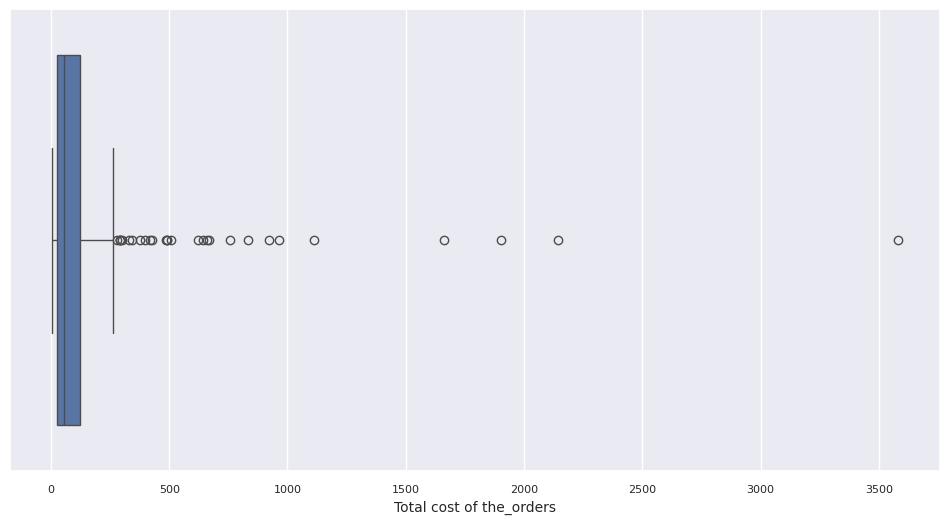

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=resto_cost, x='cost_of_the_order')
plt.locator_params(axis='x', nbins=15)
plt.xlabel('Total order cost of the restaurant', fontsize=10)
plt.xticks(fontsize=8)
plt.show()


*   The distribution is skewed towards the right.
*   There are many outliers, which means a small set of restaurants got far more order cost than the others.
*   Most of the restaurants got less than \$300.

**Let's show the restaurants with more than \$300.**

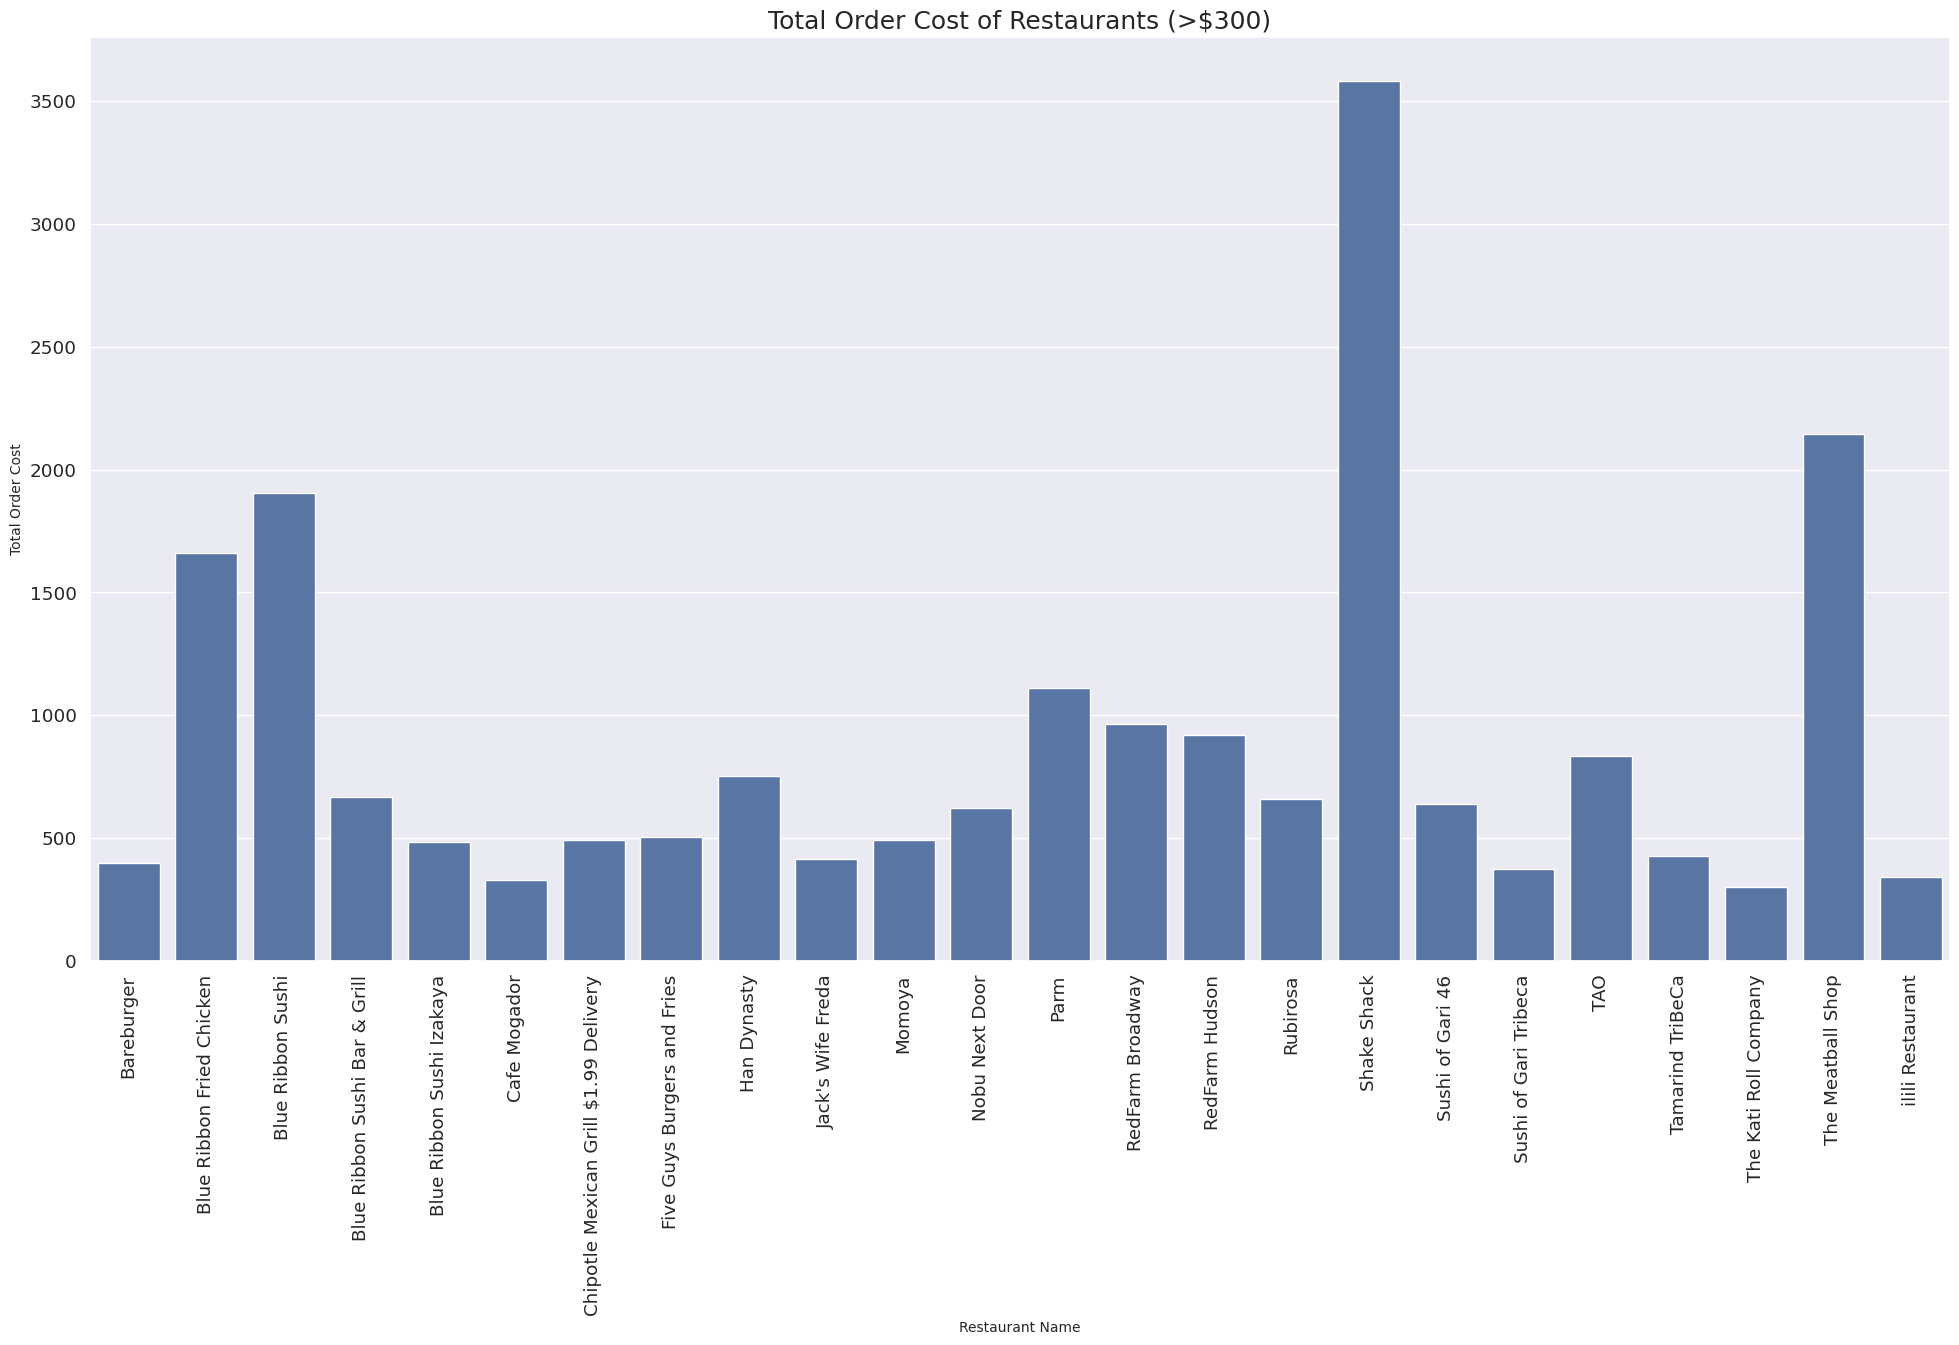

In [ ]:
plt.figure(figsize=(24,12))
sns.set(font_scale=1.2)
sns.barplot(data=resto_cost[resto_cost.cost_of_the_order > 300],y='cost_of_the_order',x='restaurant_name')
plt.xticks(rotation=90)
plt.title('Total Order Cost of Restaurants (>$300)', fontsize=18)
plt.ylabel('Total Order Cost', fontsize=10)
plt.xlabel('Restaurant Name', fontsize=10)
plt.show()


In [ ]:
print(resto_cost[resto_cost.cost_of_the_order > 300].shape[0], 'restaurants got {:.2%}'.format(resto_cost[resto_cost.cost_of_the_order > 300].cost_of_the_order.sum()/resto_cost.cost_of_the_order.sum()), 'of total orders.')
print(resto_cost[resto_cost.cost_of_the_order > 1500].shape[0], 'restaurants got {:.2%}'.format(resto_cost[resto_cost.cost_of_the_order > 1500].cost_of_the_order.sum()/resto_cost.cost_of_the_order.sum()), 'of total orders.')

24 restaurants got 67.19% of total orders.
4 restaurants got 29.67% of total orders.


*   There are 24 restaurants, each got more than \$300 orders. They occupied 67.19% of the order cost.
*   Even within these 24 restaurants, some restaurants got much higher order cost than the others.
*   The top 4 restaurants (more than \$1500) occupied 29.67% of all order cost.



**Compare order count in weekend and weekday on different cuisine types.**

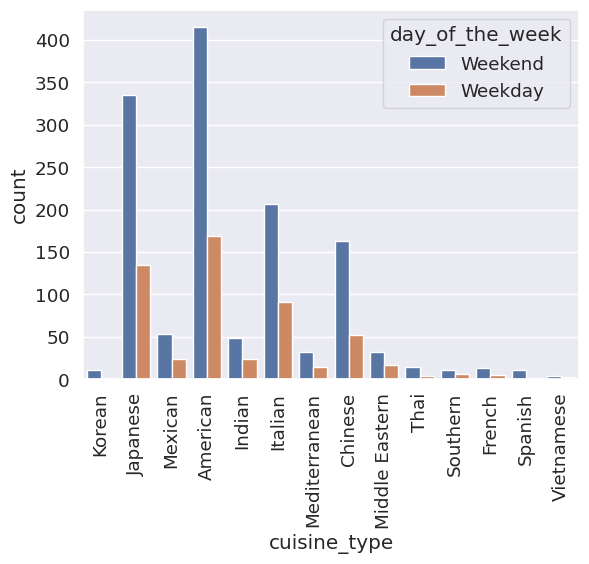

In [ ]:
sns.countplot(data=df,x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()



*  All cuisine types have more order in weekend.




**Compare rating distribution on different cuisine types.**

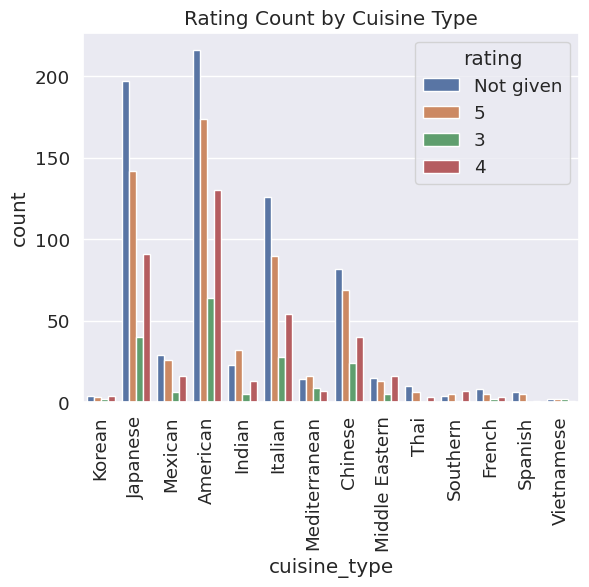

In [ ]:
sns.countplot(data=df,x='cuisine_type', hue='rating')
plt.xticks(rotation=90)
plt.title('Rating Count by Cuisine Type')
plt.show()


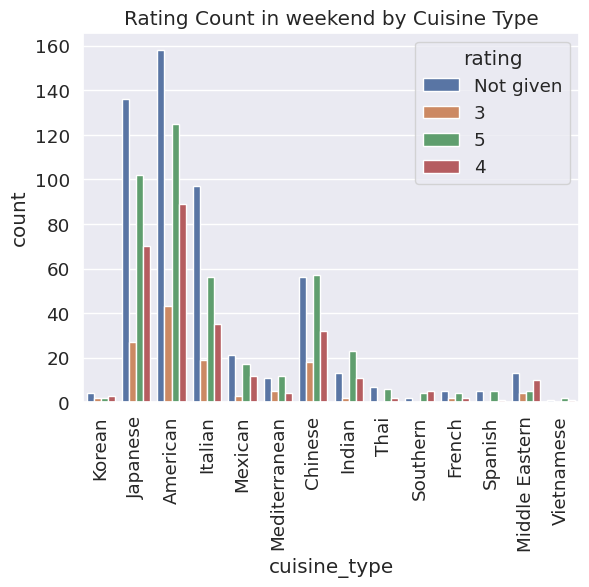

In [ ]:
sns.countplot(data=df[df.day_of_the_week=='Weekend'],x='cuisine_type', hue='rating')
plt.xticks(rotation=90)
plt.title('Rating Count in Weekend by Cuisine Type')
plt.show()

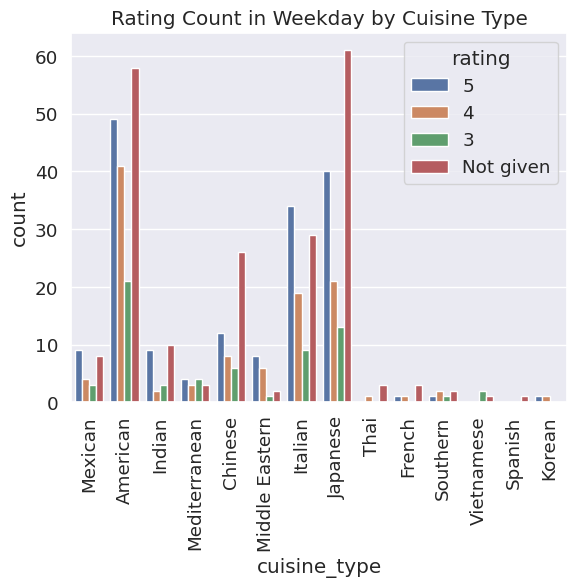

In [ ]:
sns.countplot(data=df[df.day_of_the_week=='Weekday'],x='cuisine_type', hue='rating')
plt.xticks(rotation=90)
plt.title('Rating Count in Weekday by Cuisine Type')
plt.show()


*  The ratio of no-rating is similar accross all cuisine types. The popular ones  have more orders without rating too.
*  Generally 5-rating is more than 4, and 4-rating is more than 3.
*  The above trend show no difference between weekend and weekday.



**Check the other categorical variables' impact on Food Preparation Time.**

<Figure size 2000x700 with 0 Axes>

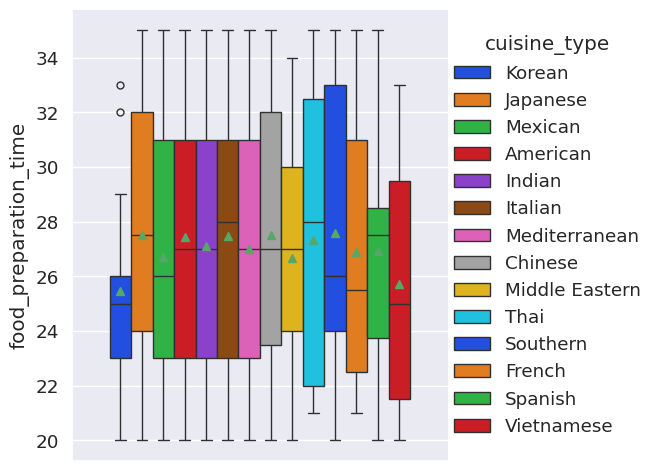

In [ ]:
plt.figure(figsize=(20,7))
sns.catplot(data=df, y="food_preparation_time", hue="cuisine_type", showmeans=True, kind='box', palette='bright');



*   Korean and Vietnamese is the fastest.
*   But Korean has two outliners which prepare so much longer than others.




<Figure size 2000x700 with 0 Axes>

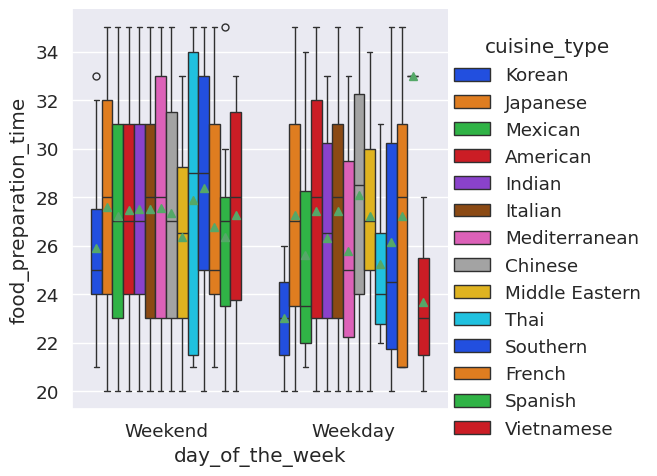

In [ ]:
plt.figure(figsize=(20,7))
sns.catplot(data=df, x="day_of_the_week", y="food_preparation_time", hue="cuisine_type", showmeans=True, kind='box', palette='bright');



*   Thai shows much more variance in weekend.
*   Korean, Mexican and Vietnamese are quicker in weekday.
*   Mexican, Mediterranean and Middle Eastern is more right skewed in weekday.
*   French is right skewed in weekend, left skewed in weekday.
*   For most cuisines, the food preparion time is less in weekday.
*   There are two outliners for Korean and Spanish in weekend.



**Check the other categorical variables' impact on Delivery Time.**

<Figure size 2000x700 with 0 Axes>

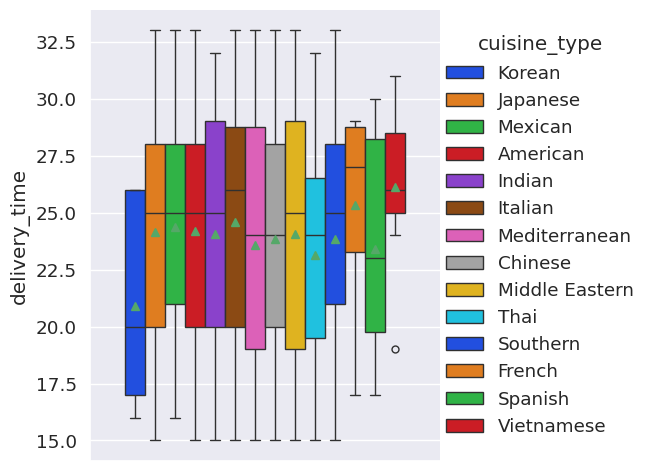

In [ ]:
plt.figure(figsize=(20,7))
sns.catplot(data=df, y="delivery_time", hue="cuisine_type", showmeans=True, kind='box', palette='bright');



*   Korean is the fastest.
*   French and Vietnamese took more time to deliver.
*   But Vietnamese has one outliner which is delivered much faster than others.



<Figure size 2000x700 with 0 Axes>

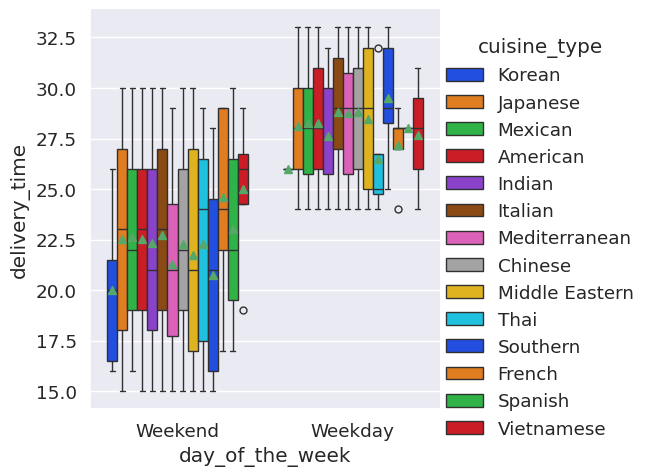

In [ ]:
plt.figure(figsize=(20,7))
sns.catplot(data=df, x="day_of_the_week", y="delivery_time", hue="cuisine_type", showmeans=True, kind='box', palette='bright');



*   For all cuisine, the delivery time is longer in weekday, but the variance is bigger in weekend.
*   Vietnamese has one outliner which is delivered much faster than others in weekend.
*   French has one outliner which is delivered much faster than others in weekday.
*   Thai has one outliner which is delivered much longer than others in weekday.




### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
from itertools import count
# Write the code here

# find restaurants with over 50 ratings
rating_count = df_2.restaurant_name.value_counts()
df_restaurants = pd.DataFrame({'restaurant_name':rating_count[rating_count > 50].index})

# inner join to get each restaurant's average rating
pd.merge(df_restaurants,df_2,how='inner',on='restaurant_name').groupby(['restaurant_name'])['num_rating'].mean()


restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: num_rating, dtype: float64

#### Observations:
There are 4 restaurants which have more than 50 ratings and their average ratings are all greater than 4:

*   Blue Ribbon Fried Chicken    4.328125

*   Blue Ribbon Sushi            4.219178

*   Shake Shack                  4.278195

*   The Meatball Shop            4.511905




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Write the code here
df.loc[:, 'net_revenue'] = 0
df.loc[ (df.cost_of_the_order <= 20) & (df.cost_of_the_order > 5), 'net_revenue'] = round(df.loc[(df.cost_of_the_order <= 20) & (df.cost_of_the_order > 5),'cost_of_the_order'] * 0.15,2)
df.loc[ df.cost_of_the_order > 20, 'net_revenue'] = round(df.loc[ df.cost_of_the_order > 20, 'cost_of_the_order'] * 0.25,2)

round(df['net_revenue'].sum(),2)

6166.4

#### Observations:
The net revenue generated by the company across all orders are $6166.4

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Write the code here
df.loc[:, 'total_time'] = df.loc[:, 'food_preparation_time'] +	df.loc[:, 'delivery_time']
print("{:.2%}".format(df[df.total_time > 60].shape[0]/df.shape[0]))

10.54%


#### Observations:
About 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

Mean delivery time during weekdays is 28.34 minutes.
Mean delivery time during weekends is 22.47 minutes.


<Figure size 2000x700 with 0 Axes>

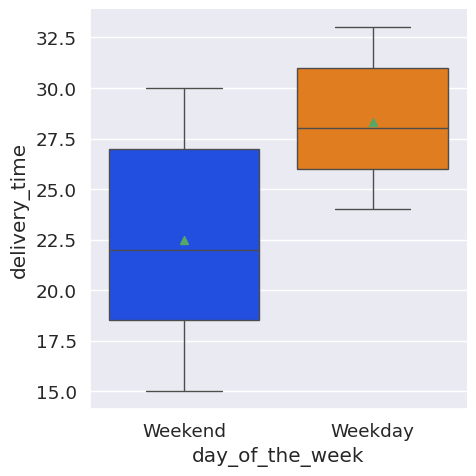

In [ ]:
# Write the code here
plt.figure(figsize=(20,7))
sns.catplot(data=df, x="day_of_the_week", y="delivery_time", hue="day_of_the_week", showmeans=True, kind='box', palette='bright');
print('Mean delivery time during weekdays is', round(df[df.day_of_the_week == 'Weekday'].delivery_time.mean(),2), 'minutes.')
print('Mean delivery time during weekends is', round(df[df.day_of_the_week == 'Weekend'].delivery_time.mean(),2), 'minutes.')

#### Observations:

*   Mean delivery time during weekdays is 28.34 minutes, while weekends is only 22.47 minutes, maybe due to traffic jam in weekdays.
*   Generally the delivery time is longer in weekday.
*   The delivery time variance is bigger in weekends.




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
*  Most popular cuisines: American, Japanese, Italian and Chinese. They consists 82.56% (by order count) of the orders.
*  Top 21 restaurants (by order count) occupied 64.12% of the orders.
Top 24 restaurants (by order cost) occupied 67.19% of the total order cost.
*  Over 50% of rated orders are 5-rating.
*  71.18% of the orders are in Weekend.
*  Food preparation time and delivery time among restaurants are consistant.


### Recommendations:

*  Send more promotions on the popular cuisines and restaurants.
*  Involve more restaurants in the popular cuisine types.
*  Weekday delivery time is a problem. Need to further study the reason (traffic, location etc.)
*  Bigger variance on the Weekend delivery time. Need to further study the reason (traffic, location etc.)
*  Most orders are in the lower cost side, send more promotions to encourage/reward customers to order more.
*  Over 70% of the orders are in Weekend, send more promotions to encourage/reward customers to order more in weekday.
*  There are a lot of order without ratings. Should encourage/reward customers to give more ratings.


---